# Unsupervised learning
A key distinction between different machine learning is whether they are supervised or unsupervised. Supervised means that we have output "correct answers" which we want to train the algorithm to produce. This could be categories for supervised classification or real values for supervised regressions. Unsupervised learning is when we do not have this output data. Typically we want to use a machine learning algorithm to tell us something about what is in our dataset, usally by grouping data points into clusters of similar points, that is points that are close to each other in parameter space (for some definition of close). 

Further reading:
* https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import matplotlib.pyplot
import matplotlib.colors
import numpy
import pandas

In [2]:
import sklearn
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.mixture

## Finding clusters - blobs dataset
To demonstrate clustering algorithms, we will use the make_blobs function in scikit-learn to create a synthetic data which can easily be visualised.

Documentation:
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


In [3]:
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
colors = {0: 'red', 1: 'blue', 2: 'green'}
num_blobs = 3
num_features = 2
cluster_std = 3.0
grid_size = 25
num_samples = 400

## Data loading and exploration

We are using the make blobs function, which tells us which cluster each sample was generated from, so we can view this information, but we're not going to make use of it in our training and testing, because we're doing unsupervised learning. Sometimes in supervised learning, there is no "right" answer and you just want to learn something about structure of the data. In other cases there may be a correct labelling but we don't have access to that information.

In [4]:
# generate 2d classification dataset
X, y = sklearn.datasets.make_blobs(
    n_samples=num_samples, 
    centers=num_blobs, 
    n_features=num_features, cluster_std=cluster_std)

In [5]:
val_ranges=[(min(X[:,ix1]), max(X[:,ix1])) for ix1 in range(0,X.shape[1])]
grid_x, grid_y = numpy.meshgrid( numpy.arange(val_ranges[0][0], val_ranges[0][1], (val_ranges[0][1] - val_ranges[0][0]) / grid_size),
               numpy.arange(val_ranges[1][0], val_ranges[1][1], (val_ranges[1][1] - val_ranges[1][0]) / grid_size))
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()
X_grid = numpy.concatenate([grid_x.reshape(grid_x.shape[0],1), grid_y.reshape(grid_y.shape[0],1)], axis=1)

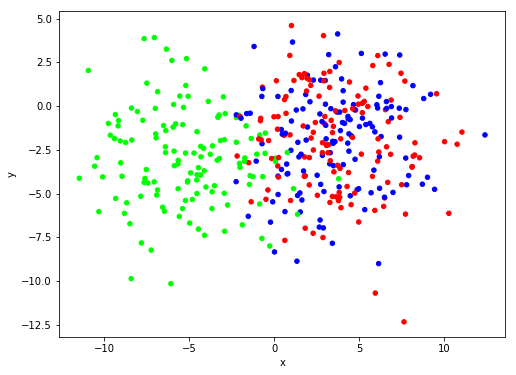

In [6]:
# scatter plot, dots colored by class value
df_raw = pandas.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))

fig_data = matplotlib.pyplot.figure('blobs', figsize=(8,6))
fig_data = fig_data.add_subplot(111)
_ = df_raw.plot(ax=fig_data,kind='scatter',x='x',y='y',c='label',cmap=cmap_bold,colorbar=False)


We can see here that our clusters overlap. Our clustering algorithms cannot separate out overlapping points, and may find a different structure to the one we used to generate the data.

## Data preparation
As with supervised learning, some preprocessing of the data is likely to be needed before applying a machine learning algorithm to the problem. In this case, we want to consider each of the 2 features to be equally important, so we normalise the data, which means we transform the data to have zero mean and standard deviation of 1. When calculating clusters, if we don't normalise the data, larger magnitude features will have a disproportianate effect on calculating the distance between observations, skweing clustering results.

In [7]:
scaler1 = sklearn.preprocessing.StandardScaler()
scaler1.fit(X)
X_scaled = scaler1.transform(X)

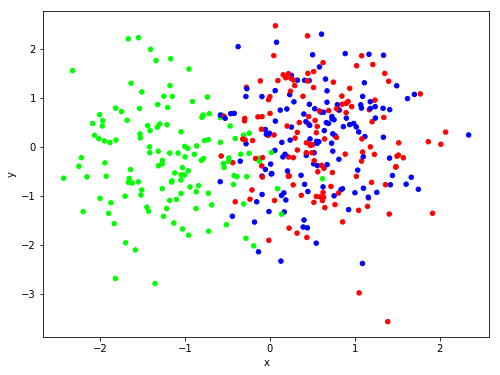

In [8]:
df_blobs = pandas.DataFrame(dict(x=X_scaled[:, 0], y=X_scaled[:, 1], label=y))
fig_scaled = matplotlib.pyplot.figure('blobs_scaled', figsize=(8,6))
ax_scaled = fig_scaled.add_subplot(111)
_ = df_blobs.plot(ax=ax_scaled,kind='scatter',x='x',y='y',c='label',cmap=cmap_bold,colorbar=False)

## Clustering the data

For this example, we will use a very simple clustering algorothm, k-means. In this algorithm, points are initially assigned to classes randomly. The mean position in the feature space of all the points in a particular class is calculated and this is cluster centre for that class. The lables of the points are then calculated based on which cluster centre they are closest to. The cluster centres then update based on the new labelling. The cycle of updating cluster centres then labels continues until convergence. 

Further reading:
* https://scikit-learn.org/stable/modules/clustering.html#k-means

Documentation:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


The most important hyperparameter (a parameter not calculated in the training process) is the number of `l`

In [9]:
n_clusters = 3

In [10]:
clr_km = sklearn.cluster.KMeans(n_clusters=n_clusters)
clr_km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Once we have clustered the data, we can transform the data into "cluster space". This tells us how far each point is from each of the cluster centres. The assignment of the point is based on which cluster centre it is closest to. 

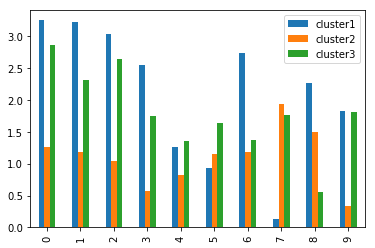

In [11]:
X_cluster_space = clr_km.transform(X_scaled)
_ = pandas.DataFrame(X_cluster_space[:10,:], columns=['cluster1','cluster2','cluster3']).plot.bar()

In [12]:
y_cluster = clr_km.predict(X_scaled)

In [13]:
df_blobs['output_knn'] = y_cluster

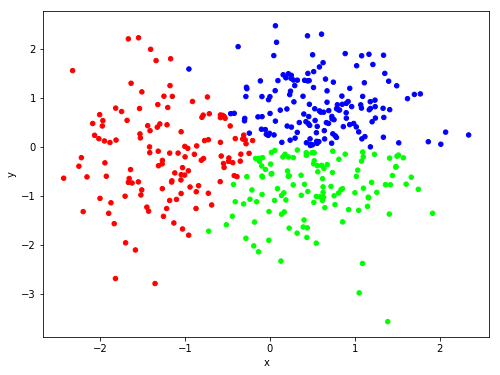

In [14]:
fig_knn = matplotlib.pyplot.figure('clusters', figsize=(8,6))
ax_knn = fig_knn.add_subplot(111)
_ = df_blobs.plot(ax=ax_knn,kind='scatter',x='x',y='y',c='output_knn',cmap=cmap_bold,colorbar=False, marker='o')

## Probability distributions
An alternative clustering algorithm is Gaussian Mixture Models (GMMs). This assumes that points are sampled from several Gaussian distributions. Expectation-maximization is used to fit the gaussian distributions to the data. An advatange of this technique over k-means clustering is that the clusters do not need to have the same variance in each dimension.

Further reading
* https://scikit-learn.org/stable/modules/mixture.html

Documentation
* https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

Our data was generated using clusters, but often in unsupervised learning problems we don't know this. So for this example we'll try using 2 components for our GMM.

In [ ]:
n_components_gmm = 3

In [16]:
clr_gmm = sklearn.mixture.GaussianMixture(n_components=n_components_gmm)
clr_gmm.fit(X_scaled)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [17]:
y_gmm = clr_gmm.predict(X_scaled)

In [18]:
df_blobs['output_gmm'] = y_gmm

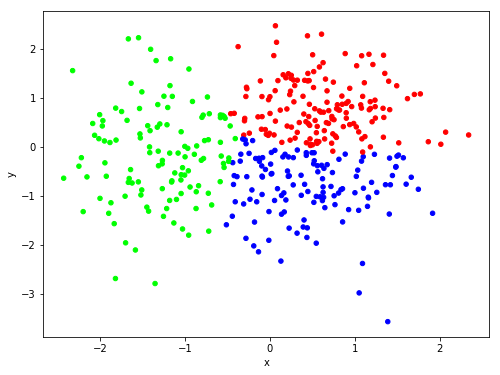

In [19]:
fig_gmm_result = matplotlib.pyplot.figure('gmm_result', figsize=(8,6))
ax_gmm_result = fig_gmm_result.add_subplot(111)
_ = df_blobs.plot(ax=ax_gmm_result,kind='scatter',x='x',y='y',c='output_gmm',cmap=cmap_bold,colorbar=False, marker='o')

## Further learning
As we can see in these examples,  the clusters the unsupervised learning algorithms have found are more spatially coherent with no overlaps compared to the generating clusters. This is always the case in the feature space where the clustering happens. One can achieve more complicated structures in the original feature space by applying a non-linear transformation to a modified feature space and doing the cluster in that space. This is similar to the "kernel trick" in ridge regression. This in general is called "manifold learning" (see below), and forms a second step in the unsupervised learning pipeline.

Other popular domains for unsupervised learning include:
* outlier detection https://scikit-learn.org/stable/modules/outlier_detection.html
* manifold learning https://scikit-learn.org/stable/modules/manifold.html